# Bar Graph Detection

In [6]:
from opencv_alvin import *
import pytesseract as pyt
%matplotlib inline

In [12]:
#import pytesseract as pyt
def remove_text(img):
    h=img.shape[0]
    boxes=pyt.image_to_boxes(img)
    for b in boxes.splitlines():
        b = b.split(' ')
        charLen_x=int((int(b[3])-int(b[1]))*0.5)
        charLen_y=int((int(b[4])-int(b[2]))*0.5)
        if charLen_x>img.shape[0]*0.3 or charLen_y>img.shape[1]*0.3:
            continue
        else:
            img = cv2.rectangle(img, (int(b[1])-charLen_x,h - int(b[2])+charLen_y), (int(b[3])+charLen_x, h - int(b[4])-charLen_y), (255, 255, 255), -1)
    im(img,"after removing the text")
    return img

def bar_graph_detector(img_org):
    ''' img should be grayscale and enhanced without text'''
    kernel=np.ones((5,5),np.uint8)
    img=cv2.morphologyEx(img_org,cv2.MORPH_CLOSE,kernel,iterations=1)
    #img=cv2.dilate()
    im(img,"before removing text")
    
    img=remove_text(img)
    #img=cv2.blur(img,(3,3))
    canny_edges=cv2.Canny(img,20,100)
    im(canny_edges,'canny images')
    ci,contour,hierarchy=cv2.findContours(canny_edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    count=0
    disp=img_org
    tot_len=len(contour)
    if tot_len<2:
        return (0,0,0)
    for c in contour:

        #accuracy=0.003*cv2.arcLength(c,True)
        #approx=cv2.approxPolyDP(c,accuracy,True)
        hull=cv2.convexHull(c)
        approx=hull
        if 4<=len(approx)<=7:
            count+=1
            disp=cv2.drawContours(disp,[c],0,(255,0,0),1)
        else:
            disp=cv2.drawContours(disp,[c],0,(0,0,255),1)
            #print(len(approx))
    #print(str("accuracy is : ")+str(count/tot_len)+str(" ")+str(tot_len))
    return (disp,count,tot_len)

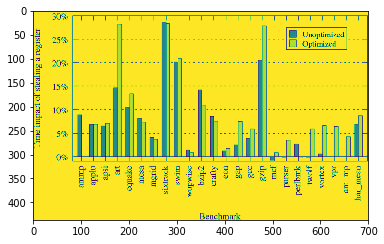

In [14]:
IM=cv2.imread('bar_graph_png/1.png')
IM_G=cv2.cvtColor(IM,cv2.COLOR_BGR2GRAY)
pim(IM_G)


In [15]:
res_img,success,total=bar_graph_detector(IM_G)

if total==0:
    print("No bar graph detected")
    #pim(cv2.cvtColor(IM,cv2.COLOR_BGR2RGB))
else:
    print(str("accuracy is : ")+str(success/total)+str(" ")+str(total))
    im(res_img)
    if success/total>=0.52:
        print("its a bar graph")
    else:
        print("Not a bar graph")
#im(res_img)

accuracy is : 0.6206896551724138 29
its a bar graph
